In [174]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

In [175]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

In [176]:
X_train.shape

(60000, 28, 28)

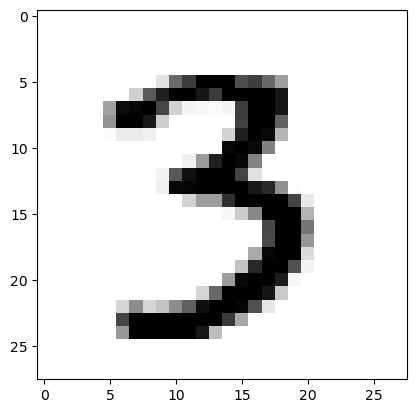

In [177]:
plt.imshow(X_train[10000], cmap=plt.cm.binary)
plt.show()

In [178]:
print(X_train[10000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  29 150 195 254 255 254 176 193 150
   96   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  48 166 224 253 253 234 196 253 253 253 253
  233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  93 244 249 253 187  46  10   8   4  10 194 253 253
  233   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 107 253 253 230  48   0   0   0   0   0 19

In [179]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [180]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [181]:
model = Sequential()

In [182]:
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 500)               392500    
                                                                 
 activation_12 (Activation)  (None, 500)               0         
                                                                 
 dropout_8 (Dropout)         (None, 500)               0         
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 activation_13 (Activation)  (None, 500)               0         
                                                                 
 dropout_9 (Dropout)         (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [183]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [184]:
model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.9252
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1021 - accuracy: 0.9683
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9770
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0578 - accuracy: 0.9818
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0460 - accuracy: 0.9847


In [185]:
model.evaluate(X_test,y_test)
#print(score[0])

313/313 [==============================] - 0s 764us/step - loss: 0.0681 - accuracy: 0.9785


[0.06814438849687576, 0.9785000085830688]

In [186]:
predicted_digits = model.predict(X_train)

1875/1875 [==============================] - 1s 570us/step


In [187]:
predicted_digits[10000]

array([1.2115895e-14, 2.4474072e-11, 2.4914798e-10, 1.0000000e+00,
       8.6842870e-13, 1.0244050e-09, 1.2206346e-16, 2.9394272e-11,
       2.0733995e-10, 3.5607275e-10], dtype=float32)

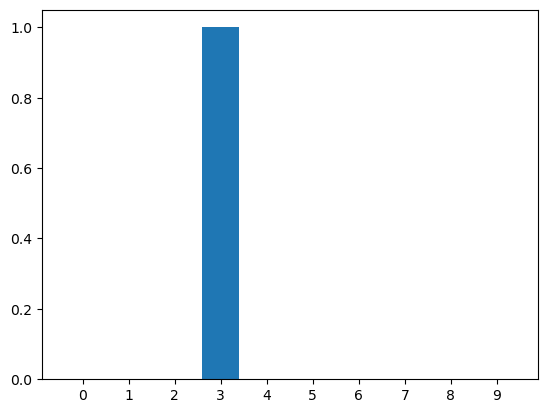

In [188]:
plt.bar(range(0,10),predicted_digits[10000])
plt.xticks(np.arange(0, 10, 1))
plt.show()

In [189]:
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

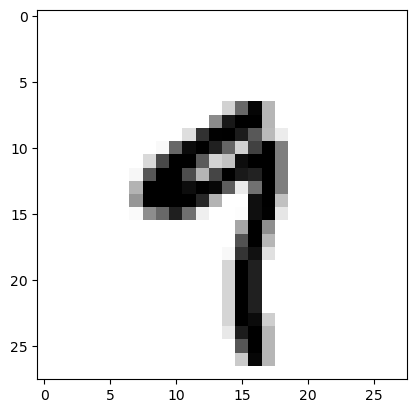

In [190]:
plt.imshow(X_train[10003], cmap=plt.cm.binary)
plt.show()

# Which digits have the most disagreement?

Use "entropy". The idea comes from information theory, introduced by Claude Shannon in 1948. It is the foundation for how to measure uncertainty or "information content" in a probabilistic system.

### Discrete Entropy Formula

The entropy $H(p)$ of a discrete probability distribution 
$p = [p_1, p_2, \dots, p_k]$ is defined as:

$$
H(p) = -\sum_{i=1}^{k} p_i \log p_i
$$

- $H(p)$ measures the uncertainty in the distribution.
- $p_i$ is the probability of the $i$-th outcome.


### Example:

Suppose the model outputs equal probability for each digit from 0 to 9:

p = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

This is a uniform distribution over 10 classes.

Since all probabilities are equal:

$$
H(p) = -\sum_{i=1}^{10} 0.1 \log_2(0.1)
$$

Factor out the constant:

$$
H(p) = -10 \cdot 0.1 \cdot \log_2(0.1)
$$

with

$$
\log_2(0.1) \approx -3.3219
$$

gives

$$
H(p) = -1 \cdot (-3.3219) = 3.3219\ \text{bits}
$$


### Another example

Suppose the model outputs:

p = [0.82, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

This means the model is pretty confident it's class 0, and gives small weight to others.

#### Entropy formula (in bits):

$$
H(p) = -\sum_{i=1}^{10} p_i \log_2 p_i
$$

Break it into parts:

- For the confident class (index 0):
  $$
  -0.82 \cdot \log_2(0.82) \approx -0.82 \cdot (-0.289) \approx 0.237
  $$

- For each of the other 9 classes:
  $$
  -0.02 \cdot \log_2(0.02) \approx -0.02 \cdot (-5.6439) \approx 0.1129
  $$
  $$
  \text{Multiply by 9 and get} \\ 9 \cdot 0.1129 \approx 1.016
  $$

Now add everything:

$$
H(p) \approx 0.237 + 1.016 = 1.253\ \text{bits}
$$

---




In [191]:
from scipy.stats import entropy

entropies = entropy(predicted_digits, axis=1)

In [192]:
entropy(predicted_digits[10000])

4.0418698e-08

In [193]:
entropy(predicted_digits[10003])

0.83259845

In [194]:
# 10 highest entropy values
np.sort(entropies)[-10:]

array([1.4687978, 1.4721569, 1.474685 , 1.5226891, 1.5548538, 1.6058671,
       1.6160122, 1.6250185, 1.6645701, 1.716193 ], dtype=float32)

In [195]:
# their locations
np.argsort(entropies)[-10:]

array([ 8853, 54296, 30900, 23824, 30130, 32829,  8202, 36409, 59747,
       17625])

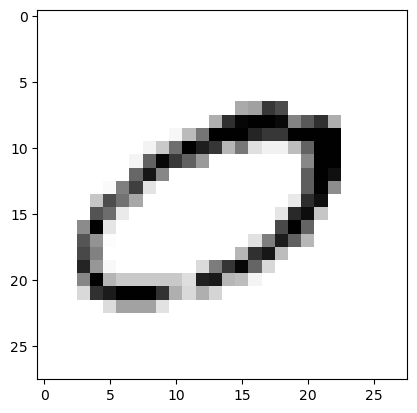

In [197]:
plt.imshow(X_train[17625], cmap=plt.cm.binary)
plt.show()

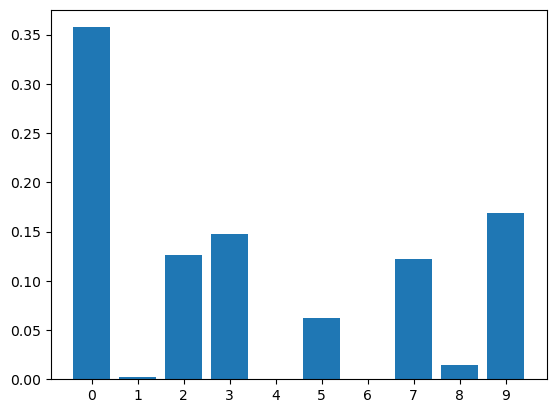

In [198]:
plt.bar(range(0,10),predicted_digits[17625])
plt.xticks(np.arange(0, 10, 1))
plt.show()

In [200]:
# what was it?
y_train[17625]

0

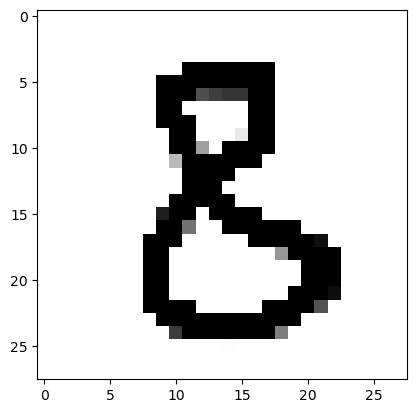

In [366]:
## test yourself
import cv2

img = cv2.imread('/Users/eren/Dropbox/test_digit.png')
img = cv2.resize(img,(28,28))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # rgb to b/w
img = cv2.bitwise_not(img) # invert black to white
plt.imshow(img,cmap=plt.cm.binary)
plt.show()

# some processing for ML
img = img.reshape(1, 784).astype('float32')
img = img/255

In [367]:
img.shape

(1, 784)

In [368]:
preds = model.predict(img)[0]
print(preds)

1/1 [==============================] - 0s 8ms/step
[1.00158482e-04 1.82209420e-04 5.39913727e-03 1.14979325e-02
 1.86710768e-05 2.06662007e-04 9.22658728e-06 1.08482327e-05
 9.82555389e-01 1.97987156e-05]


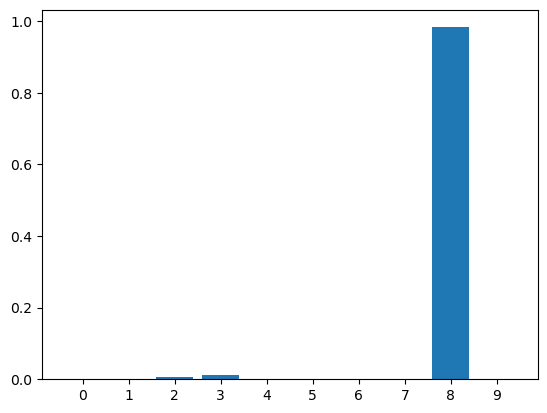

In [369]:
plt.bar(range(0,10),preds)
plt.xticks(np.arange(0, 10, 1))
plt.show()

In [370]:
# look at what 8s are like in the data?
eights = predicted_digits[:, 8]

In [371]:
# most confident:
np.sort(eights)[-10:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [372]:
# Get indices
indices = np.argsort(eights)[-10:]

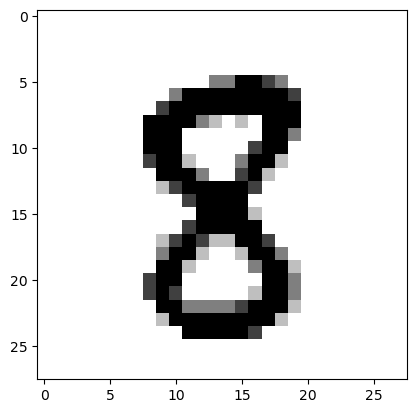

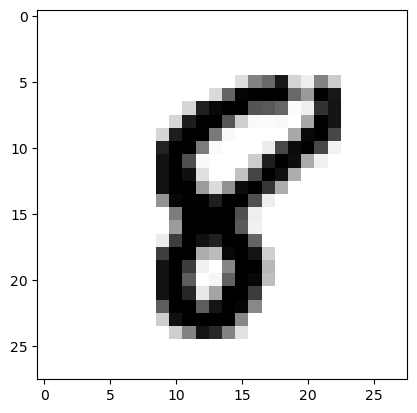

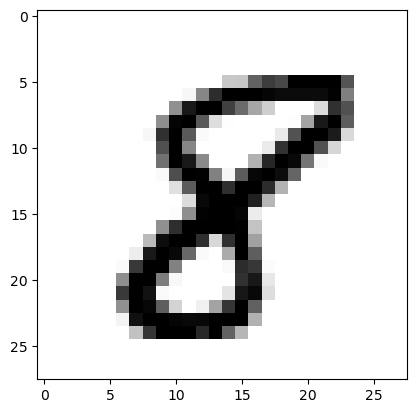

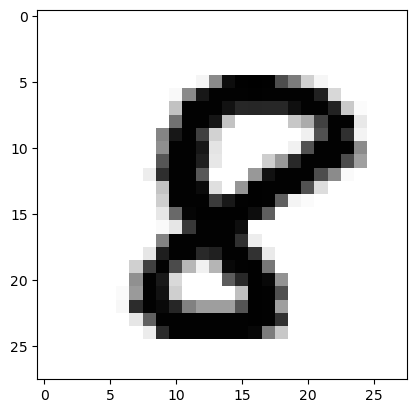

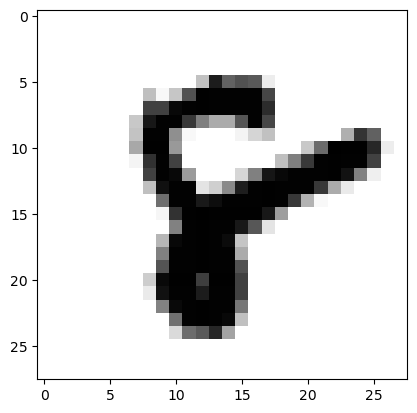

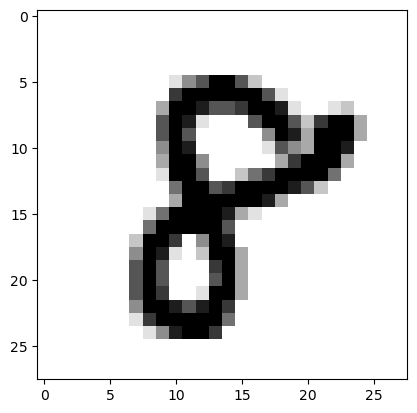

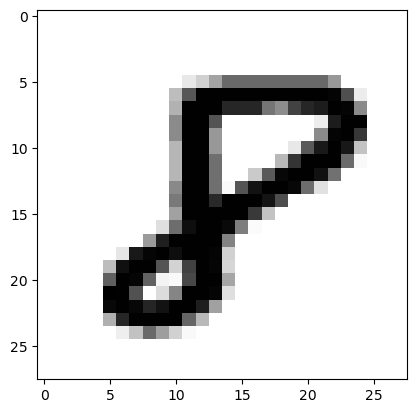

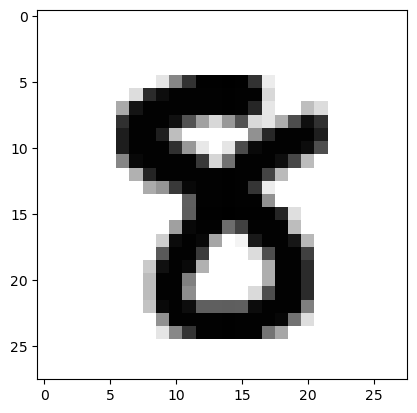

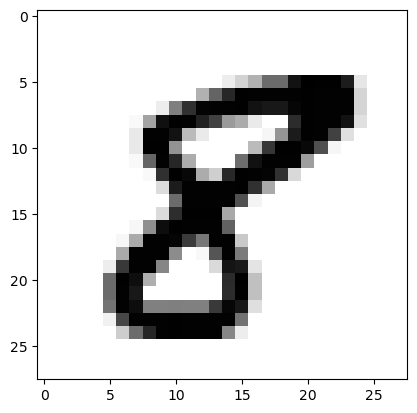

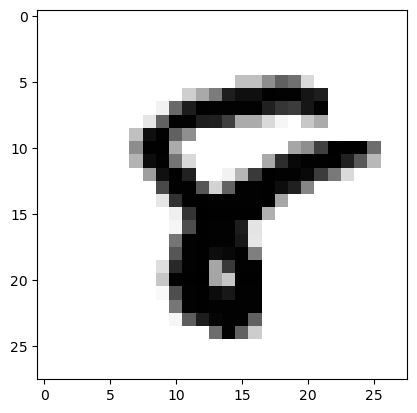

In [373]:
for i in indices:
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.show()